In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install datasets
!pip install pyvi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 55.6 MB/s eta 0:00:00


# **Đọc dữ liệu**

In [3]:
from datasets import load_dataset
import pandas as pd
import re
import torch
import numpy as np
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from transformers import AutoTokenizer
from pyvi import ViTokenizer
import joblib

from sklearn.svm import SVC
import xgboost as xgb
import tensorflow as tf
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report



In [4]:
ds = load_dataset("uitnlp/vietnamese_students_feedback")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/4.79k [00:00<?, ?B/s]

vietnamese_students_feedback.py:   0%|          | 0.00/4.97k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/475k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/63.3k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/134k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/11426 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1583 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3166 [00:00<?, ? examples/s]

In [5]:
df_train = ds['train'].to_pandas()
df_val = ds['validation'].to_pandas()
df_test = ds['test'].to_pandas()
df_train.head()

,sentence,sentiment,topic
0,slide giáo trình đầy đủ .,2,1
1,"nhiệt tình giảng dạy , gần gũi với sinh viên .",2,0
2,đi học đầy đủ full điểm chuyên cần .,0,1
3,chưa áp dụng công nghệ thông tin và các thiết ...,0,0
4,"thầy giảng bài hay , có nhiều bài tập ví dụ ng...",2,0


In [ ]:
df_train.shape

(11426, 3)

In [ ]:
df_val.shape

(1583, 3)

In [ ]:
df_test.shape

(3166, 3)

#**Tiền xử lý dữ liệu**

In [ ]:
stop_words = pd.read_csv('/content/drive/MyDrive/ML/Cuối kỳ/vietnamese-stopwords-dash.txt',header = None,names = ['Words'])
stop_words_dash = pd.read_csv('/content/drive/MyDrive/ML/Cuối kỳ/vietnamese-stopwords-dash.txt',header = None,names = ['Words'])

In [ ]:
# stop_words.head()

In [ ]:
# stop_words_dash.head()

#**Tokenizer**

In [6]:
def tokenizer(text):
    text = ViTokenizer.tokenize(text)
    return text

In [7]:
df_train['processed_text'] = df_train['sentence'].apply(tokenizer)
df_val['processed_text'] = df_val['sentence'].apply(tokenizer)
df_test['processed_text'] = df_test['sentence'].apply(tokenizer)

In [ ]:
df_train.head()

,sentence,sentiment,topic,processed_text
0,slide giáo trình đầy đủ .,2,1,slide giáo_trình đầy_đủ .
1,"nhiệt tình giảng dạy , gần gũi với sinh viên .",2,0,"nhiệt_tình giảng_dạy , gần_gũi với sinh_viên ."
2,đi học đầy đủ full điểm chuyên cần .,0,1,đi học đầy_đủ full điểm chuyên_cần .
3,chưa áp dụng công nghệ thông tin và các thiết ...,0,0,chưa áp_dụng công_nghệ thông_tin và các thiết_...
4,"thầy giảng bài hay , có nhiều bài tập ví dụ ng...",2,0,"thầy giảng bài hay , có nhiều bài_tập ví_dụ ng..."


# **EDA**

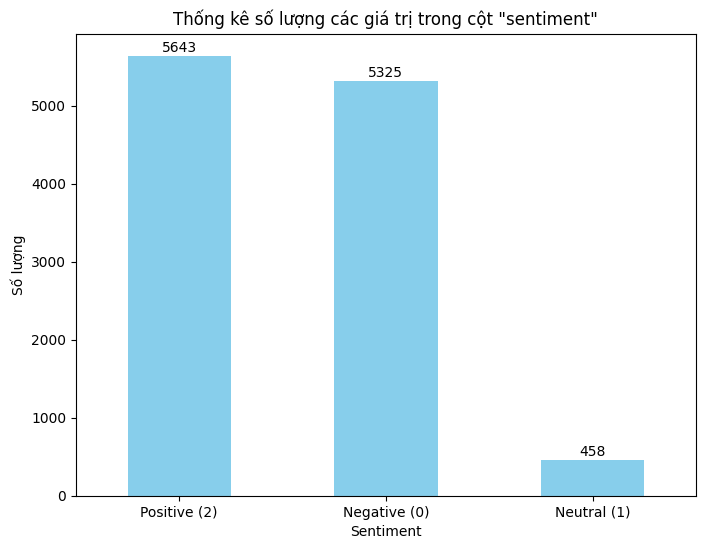

In [ ]:
sentiment_counts = ds['train']['sentiment']
sentiment_counts = pd.Series(sentiment_counts).value_counts()
sentiment_counts = sentiment_counts.sort_values(ascending=False)

plt.figure(figsize=(8, 6))
ax = sentiment_counts.plot(kind='bar', color='skyblue')

for i, value in enumerate(sentiment_counts):
    ax.text(i, value + 10, str(value), ha='center', va='bottom', fontsize=10)

plt.title('Thống kê số lượng các giá trị trong cột "sentiment"')
plt.xlabel('Sentiment')
plt.ylabel('Số lượng')
plt.xticks([0, 1, 2], ['Positive (2)', 'Negative (0)', 'Neutral (1)'], rotation=0)
plt.show()


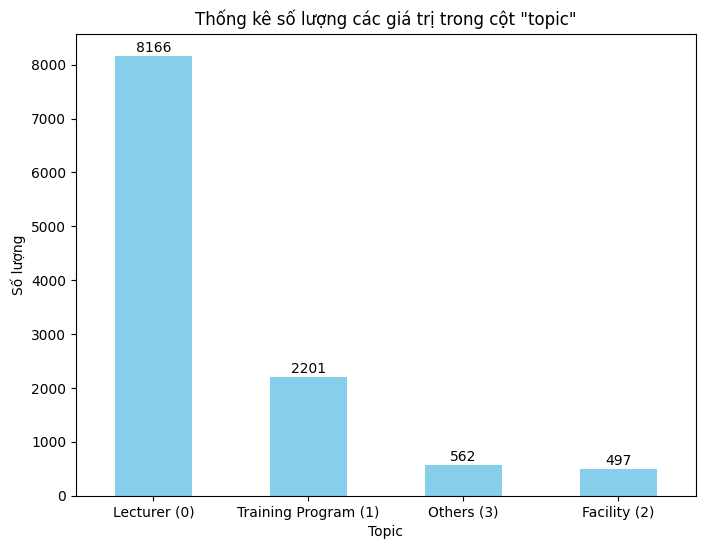

In [ ]:
topic_counts = ds['train']['topic']
topic_counts = pd.Series(topic_counts).value_counts()
topic_counts = topic_counts.sort_values(ascending=False)

plt.figure(figsize=(8, 6))
ax = topic_counts.plot(kind='bar', color='skyblue')

for i, value in enumerate(topic_counts):
    ax.text(i, value + 20, str(value), ha='center', va='bottom', fontsize=10)

plt.title('Thống kê số lượng các giá trị trong cột "topic"')
plt.xlabel('Topic')
plt.ylabel('Số lượng')
plt.xticks([0, 1, 2, 3], ['Lecturer (0)', 'Training Program (1)', 'Others (3)', 'Facility (2)'], rotation=0)
plt.show()


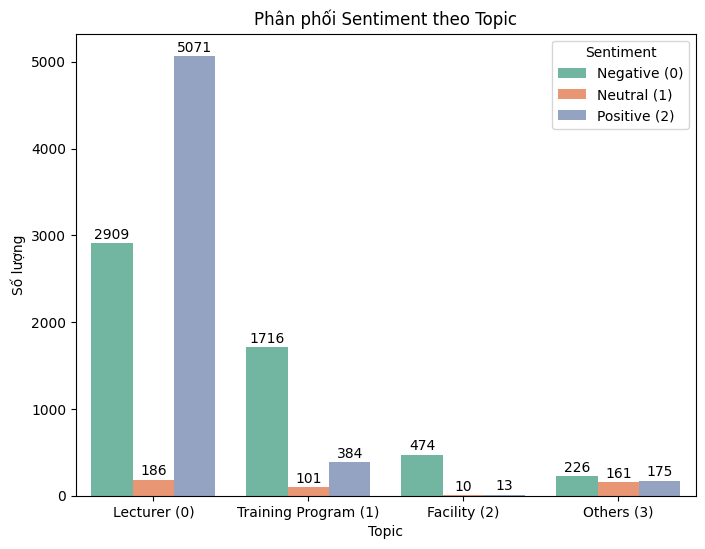

In [ ]:
df = pd.DataFrame(ds['train'])
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='topic', hue='sentiment', data=df, palette='Set2')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    fontsize=10, color='black',
                    xytext=(0, 6), textcoords='offset points')

plt.title('Phân phối Sentiment theo Topic')
plt.xlabel('Topic')
plt.ylabel('Số lượng')
plt.xticks([0, 1, 2, 3], ['Lecturer (0)', 'Training Program (1)', 'Facility (2)', 'Others (3)'], rotation=0)
plt.legend(title='Sentiment', labels=['Negative (0)', 'Neutral (1)', 'Positive (2)'])
plt.show()

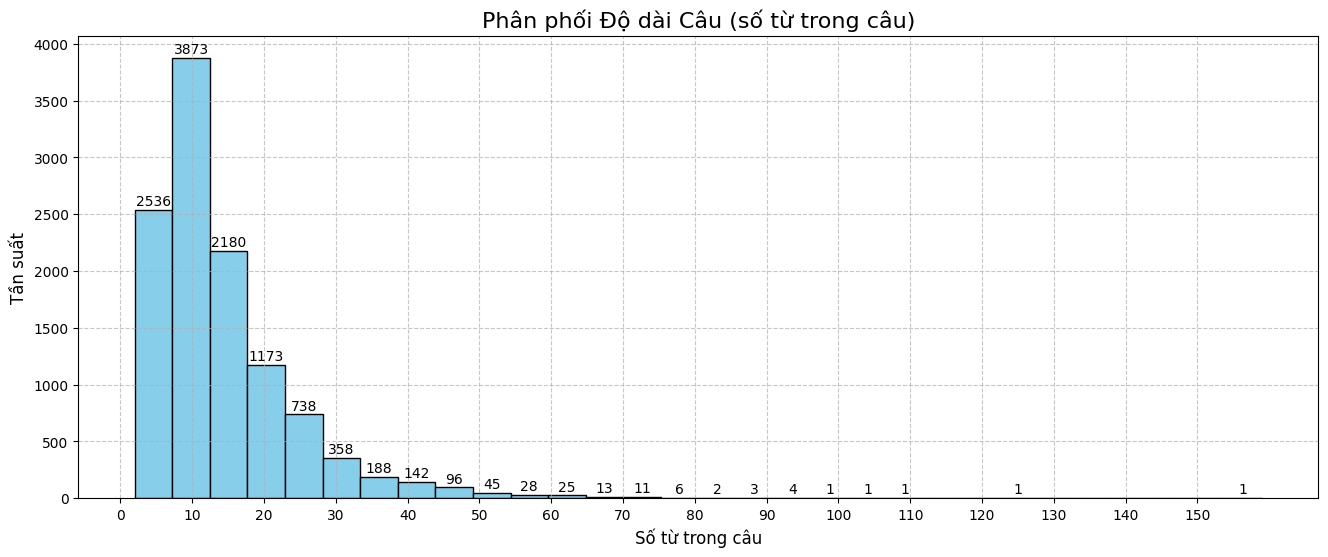

In [ ]:
seq_len = [len(i.split()) for i in df['sentence']]
plt.figure(figsize=(16, 6))
n, bins, patches = plt.hist(seq_len, bins=30, color='skyblue', edgecolor='black')

for i in range(len(patches)):
    height = patches[i].get_height()
    if height > 0:
        plt.text(patches[i].get_x() + patches[i].get_width() / 2, height + 12,
                 f'{int(height)}', ha='center', va='bottom', fontsize=10, color='black')

plt.title('Phân phối Độ dài Câu (số từ trong câu)', fontsize=16)
plt.xlabel('Số từ trong câu', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)
plt.xticks(range(0, max(seq_len) + 1, 10))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
stop_words_list = stop_words['Words'].tolist()
def remove_stopwords(text, stop_words_list):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words_list]
    return ' '.join(filtered_words)
df_train['filtered_text'] = df_train['processed_text'].apply(lambda x: remove_stopwords(x, stop_words_list))
df_train['filtered_text'] = df_train['filtered_text'].str.replace('_', ' ', regex=True)

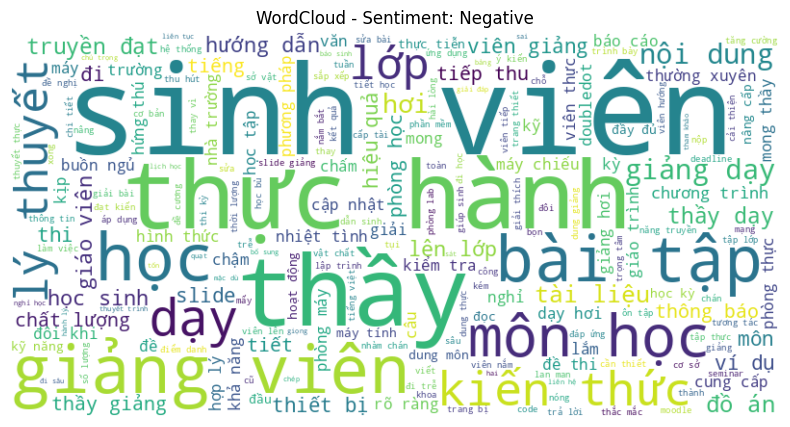

In [ ]:
sentences_0 = df_train[df_train['sentiment'] == 0]['filtered_text']
text_0 = ' '.join(sentences_0)

wordcloud_0 = WordCloud(width=800, height=400, background_color='white').generate(text_0)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_0, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Sentiment: Negative')
plt.show()

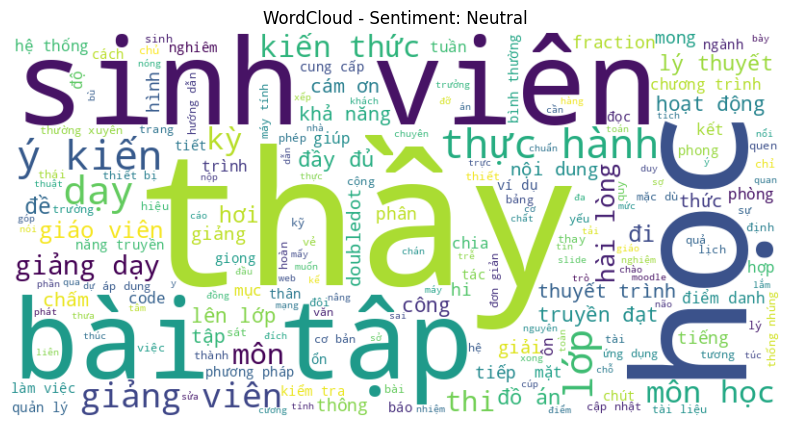

In [ ]:
sentences_1 = df_train[df_train['sentiment'] == 1]['filtered_text']
text_1 = ' '.join(sentences_1)

wordcloud_1 = WordCloud(width=800, height=400, background_color='white').generate(text_1)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Sentiment: Neutral')
plt.show()

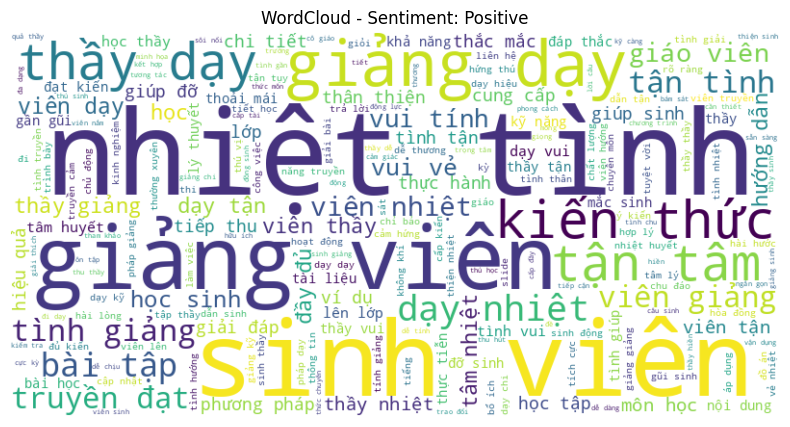

In [ ]:
sentences_2 = df_train[df_train['sentiment'] == 2]['filtered_text']
text_2 = ' '.join(sentences_2)

wordcloud_2 = WordCloud(width=800, height=400, background_color='white').generate(text_2)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_2, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Sentiment: Positive')
plt.show()

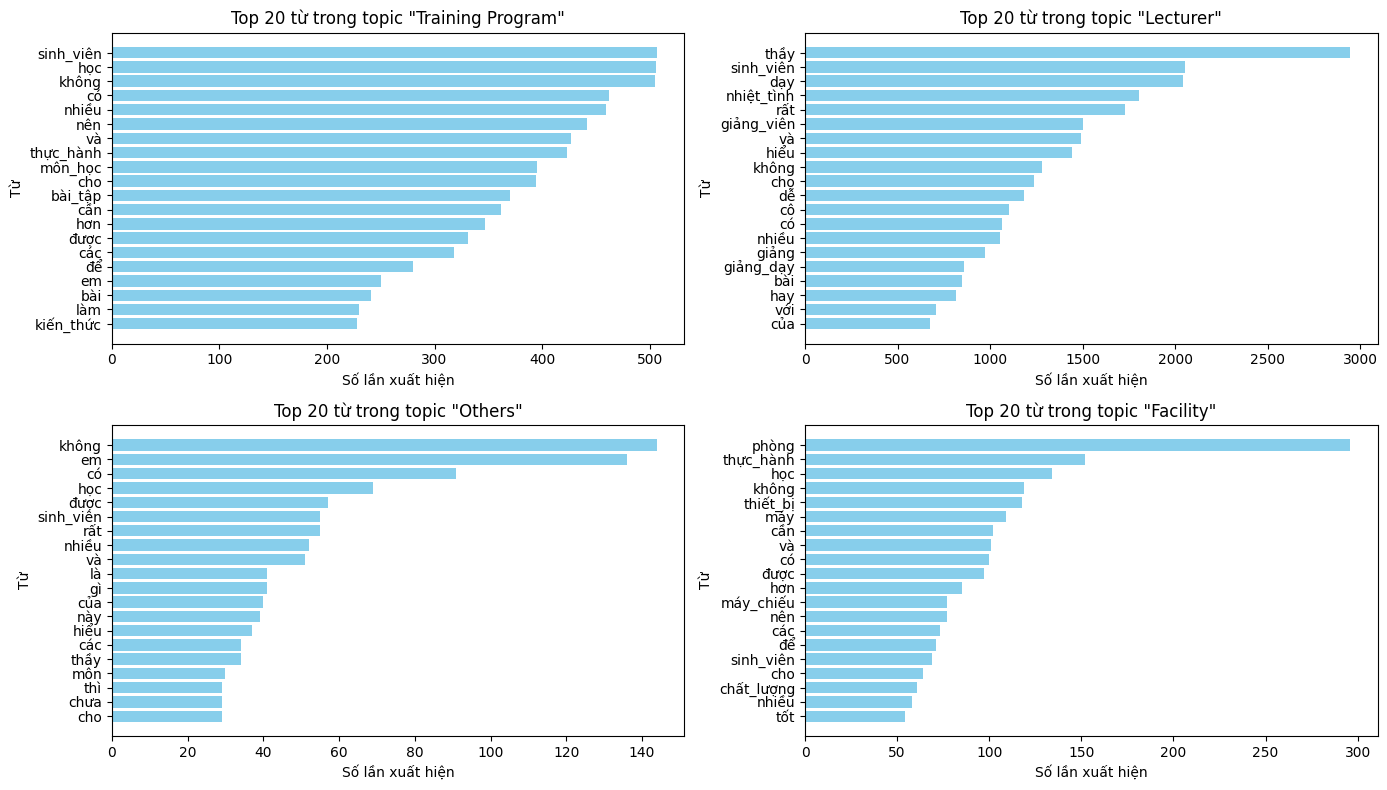

In [ ]:
topic_mapping = {
    0: 'Lecturer',
    1: 'Training Program',
    2: 'Facility',
    3: 'Others'
}

def plot_top_words_by_topic(df, topic_column, text_column, top_n=20):
    topics = df[topic_column].unique()
    plt.figure(figsize=(14, 8))

    for i, topic in enumerate(topics):
        plt.subplot(2, 2, i + 1)

        topic_text = ' '.join(df[df[topic_column] == topic][text_column].dropna())
        topic_text = re.sub(r'[^\w\s]', '', topic_text)
        words = topic_text.lower().split()

        word_counts = Counter(words)
        top_words = word_counts.most_common(top_n)
        top_words_df = pd.DataFrame(top_words, columns=['word', 'count'])

        plt.barh(top_words_df['word'], top_words_df['count'], color='skyblue')
        plt.xlabel('Số lần xuất hiện')
        plt.ylabel('Từ')
        plt.title(f'Top {top_n} từ trong topic "{topic_mapping.get(topic, "Unknown")}"')
        plt.gca().invert_yaxis()

    plt.tight_layout()
    plt.show()

plot_top_words_by_topic(df_train, 'topic', 'processed_text', top_n=20)

## **Vectorizer**

**Oversampling**

In [8]:
X = df_train.drop('sentiment', axis=1)
y = df_train['sentiment']

ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X, y)

df_train_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_train_balanced['sentiment'] = y_resampled

In [ ]:
y_resampled.value_counts()

,count
sentiment,
2,5643
0,5643
1,5643


**TF-IDF**

In [9]:
def vectorize(max_features=5000):
      vectorizer = TfidfVectorizer(max_features=max_features)
      X_train_vec = vectorizer.fit_transform(X_train)
      X_val_vec = vectorizer.transform(X_val)
      X_test_vec = vectorizer.transform(X_test)

      return X_train_vec, X_val_vec, X_test_vec, vectorizer

X_train, y_train = df_train_balanced['processed_text'], df_train_balanced['sentiment']
X_val, y_val = df_val['processed_text'], df_val['sentiment']
X_test, y_test = df_test['processed_text'], df_test['sentiment']
X_train_vec_tf, X_val_vec_tf, X_test_vec_tf, vectorizer_tf = vectorize()

# **Mô hình máy học**

**Tìm kiếm các siêu tham số**

**XGBoost**

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='merror',
                              use_label_encoder=False, random_state = 42)
random_search_tf = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid,
                                   n_iter=5, scoring='accuracy', cv=3, verbose=2, random_state=42, n_jobs=-1)

random_search_tf.fit(X_train_vec_tf, y_train)

print("Best parameters:", random_search_tf.best_params_)
print("Best score:", random_search_tf.best_score_)

best_xgb_model_tf = random_search_tf.best_estimator_

y_pred_val_tf = best_xgb_model_tf.predict(X_val_vec_tf)
print(classification_report(y_val, y_pred_val_tf));

In [ ]:
xgb_model = random_search_tf.best_estimator_

In [ ]:
model_path = "/content/drive/MyDrive/DaVi/xgb_tf.pkl"
joblib.dump(xgb_model , model_path)

print("Mô hình XGB đã được lưu thành công!")

Mô hình XGB đã được lưu thành công!


**Naive Bayes**

In [ ]:
print("\nTuning Multinomial Naive Bayes...")
mnb = MultinomialNB()
mnb_params = {
    'alpha': [0.1, 0.5, 1, 2, 5, 10],
    'fit_prior': [True, False]
}
mnb_grid_tf = GridSearchCV(mnb, mnb_params, cv=5, scoring='accuracy')
mnb_grid_tf.fit(X_train_vec_tf, y_train)


print("Best parameters for MultinomialNB:", mnb_grid_tf.best_params_)
y_pred_mnb_tf = mnb_grid_tf.best_estimator_.predict(X_val_vec_tf)
print(classification_report(y_val, y_pred_mnb_tf))


Tuning Multinomial Naive Bayes...
Best parameters for MultinomialNB: {'alpha': 0.1, 'fit_prior': True}
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       705
           1       0.27      0.49      0.35        73
           2       0.93      0.85      0.89       805

    accuracy                           0.84      1583
   macro avg       0.68      0.73      0.70      1583
weighted avg       0.86      0.84      0.85      1583



In [ ]:
nb_grid = mnb_grid_tf.best_estimator_

In [ ]:
model_path = "/content/drive/MyDrive/DaVi/nb_tf.pkl"
joblib.dump(nb_grid , model_path)

print("Mô hình NB đã được lưu thành công!")

Mô hình SVM đã được lưu thành công!


**SVM**

In [ ]:
print("\nTuning SVM...")
svm = SVC()
svm_params = {
    'C': [1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [1e-2, 0.1],
}
svm_grid_tf = GridSearchCV(svm, svm_params, cv=3, scoring='accuracy')
svm_grid_tf.fit(X_train_vec_tf, y_train)

print("Best parameters for SVM:", svm_grid_tf.best_params_)
y_pred_svm_tf = svm_grid_tf.best_estimator_.predict(X_val_vec_tf)
print(classification_report(y_val, y_pred_svm_tf))


Tuning SVM...
Best parameters for SVM: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       705
           1       0.31      0.52      0.39        73
           2       0.95      0.90      0.92       805

    accuracy                           0.88      1583
   macro avg       0.72      0.77      0.74      1583
weighted avg       0.90      0.88      0.89      1583



In [ ]:
model_path = "/content/drive/MyDrive/DaVi/svm_tf.pkl"
joblib.dump(best_svm_model, model_path)

print("Mô hình SVM đã được lưu thành công!")


Mô hình SVM đã được lưu thành công!


# **LSTM TF_IDF**

In [ ]:
# ------------------------ Deep Learning LSTM ------------------------
dense_matrix_X_train = X_train_vec_tf.toarray()
dense_matrix_X_val = X_val_vec_tf.toarray()

vec_data_train = tf.convert_to_tensor(dense_matrix_X_train, dtype=tf.float32)
vec_data_val = tf.convert_to_tensor(dense_matrix_X_val, dtype=tf.float32)

data_vocab_size = len(vectorizer_tf.vocabulary_) + 1

vec_data_train = tf.expand_dims(vec_data_train, axis=-1)
vec_data_val = tf.expand_dims(vec_data_val, axis=-1)
print(data_vocab_size)
print(vec_data_train.shape)
print(vec_data_val.shape)

3665
(16929, 3664, 1)
(1583, 3664, 1)


In [ ]:
df_encoded_train = pd.get_dummies(y_train.to_frame()['sentiment'], columns=['sentiment'], prefix='sentiment')
df_encoded_train = df_encoded_train.astype(int)

df_encoded_val = pd.get_dummies(y_val.to_frame()['sentiment'], columns=['sentiment'], prefix='sentiment')
df_encoded_val = df_encoded_val.astype(int)

In [ ]:
droupout_threadhold = 0.5
model = Sequential()
input_dim = data_vocab_size
output_dim = 60
input_length = vec_data_train.shape[1]

model.add(Bidirectional(LSTM(units=output_dim, dropout=droupout_threadhold, return_sequences=True), merge_mode='concat', input_shape=(input_length, 1)))

model.add(Bidirectional(LSTM(units=output_dim, return_sequences=True)))
model.add(GlobalAveragePooling1D())
model.add(Dense(units=40, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=30, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 3664, 120)           │          29,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 3664, 120)           │          86,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 120)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 40)                  │           4,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 40)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │           1,230 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 123,525 (482.52 KB)

 Trainable params: 123,525 (482.52 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    x = vec_data_train,
    y = df_encoded_train,
    batch_size = 64,
    epochs = 10,
    validation_data = (vec_data_val, df_encoded_val)
)

Epoch 1/10
265/265 ━━━━━━━━━━━━━━━━━━━━ 127s 453ms/step - accuracy: 0.3333 - loss: 1.0989 - val_accuracy: 0.5085 - val_loss: 1.0968
Epoch 2/10
265/265 ━━━━━━━━━━━━━━━━━━━━ 137s 447ms/step - accuracy: 0.3356 - loss: 1.0988 - val_accuracy: 0.5085 - val_loss: 1.0993
Epoch 3/10
265/265 ━━━━━━━━━━━━━━━━━━━━ 148s 469ms/step - accuracy: 0.3309 - loss: 1.0990 - val_accuracy: 0.0461 - val_loss: 1.1008
Epoch 4/10
265/265 ━━━━━━━━━━━━━━━━━━━━ 137s 449ms/step - accuracy: 0.3310 - loss: 1.0987 - val_accuracy: 0.0461 - val_loss: 1.1031
Epoch 5/10
265/265 ━━━━━━━━━━━━━━━━━━━━ 141s 445ms/step - accuracy: 0.3365 - loss: 1.0986 - val_accuracy: 0.5085 - val_loss: 1.0976
Epoch 6/10
265/265 ━━━━━━━━━━━━━━━━━━━━ 141s 441ms/step - accuracy: 0.3284 - loss: 1.0987 - val_accuracy: 0.0461 - val_loss: 1.1010
Epoch 7/10
265/265 ━━━━━━━━━━━━━━━━━━━━ 142s 441ms/step - accuracy: 0.3302 - loss: 1.0987 - val_accuracy: 0.4454 - val_loss: 1.0985
Epoch 8/10
265/265 ━━━━━━━━━━━━━━━━━━━━ 142s 442ms/step - accuracy: 0.3331 -

In [ ]:
model.save("/content/drive/MyDrive/DaVi/lstm_tf.h5")


In [ ]:
y_pred_probs = model.predict(vec_data_val)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(df_encoded_val, axis=1)

50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 170ms/step


In [ ]:
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print("\nClassification Report:\n", classification_report(y_true, y_pred))

Accuracy: 0.5085281111813014
Precision: 0.25860083986162197
Recall: 0.5085281111813014
F1 Score: 0.34285186725372496

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       705
           1       0.00      0.00      0.00        73
           2       0.51      1.00      0.67       805

    accuracy                           0.51      1583
   macro avg       0.17      0.33      0.22      1583
weighted avg       0.26      0.51      0.34      1583



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

# **Sử dụng tokenizer của keras**

In [11]:
tokenizer_data1 = Tokenizer(oov_token = '<oov>', filters = '', split = ' ')
tokenizer_data1.fit_on_texts(X_train)

tokenized_data_train1 = tokenizer_data1.texts_to_sequences(X_train)
tokenized_data_val1 = tokenizer_data1.texts_to_sequences(X_val)
tokenized_data_test1 = tokenizer_data1.texts_to_sequences(X_test)


vec_data_train1 = pad_sequences(tokenized_data_train1, maxlen = 50, padding = 'post', truncating = 'post')
vec_data_val1 = pad_sequences(tokenized_data_val1, maxlen = 50, padding = 'post', truncating = 'post')
vec_data_test1 = pad_sequences(tokenized_data_test1, maxlen = 50, padding = 'post', truncating = 'post')


data_vocab_size1 = len(tokenizer_data1.word_index) + 1
print(data_vocab_size1)
print(vec_data_train1.shape)
print(vec_data_val1.shape)

3706
(16929, 50)
(1583, 50)


In [12]:
tokenizer_vocab1 = tokenizer_data1.word_index
tokenizer_vocab1 = {word: index - 1 for word, index in tokenizer_vocab1.items()}

vectorizer1 = CountVectorizer(vocabulary=tokenizer_vocab1, max_features=5000)

X_train_vec1 = vectorizer1.fit_transform(X_train).toarray()
X_val_vec1 = vectorizer1.transform(X_val).toarray()
X_test_vec1 = vectorizer1.transform(X_test).toarray()

**LSTM**

In [ ]:
droupout_threadhold = 0.5
model_keras = Sequential()
input_dim1 = data_vocab_size1
output_dim1 = 60
input_length1 = 50
model_keras.add(Embedding(input_dim = input_dim1, output_dim = output_dim1, input_length = input_length1))
model_keras.add(Bidirectional(LSTM(units = output_dim1, dropout = droupout_threadhold, return_sequences = True), merge_mode = 'concat'))

model_keras.add(Bidirectional(LSTM(units = output_dim1, return_sequences = True)))
model_keras.add(GlobalAveragePooling1D())
model_keras.add(Dense(units = 40, activation = 'relu'))
model_keras.add(Dropout(0.1))
model_keras.add(Dense(units = 30, activation = 'relu'))
model_keras.add(Dropout(0.1))
model_keras.add(Dense(units = 20, activation = 'relu'))
model_keras.add(Dropout(0.1))
model_keras.add(Dense(units = 8, activation = 'relu'))
model_keras.add(Dense(units = 3, activation = 'softmax'))

adam = Adam(learning_rate = 0.0001)
model_keras.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_keras.build(input_shape = (None,50))
model_keras.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 50, 60)              │         222,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 50, 120)             │          58,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 50, 120)             │          86,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ (None, 120)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 40)                  │           4,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 40)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 30)                  │           1,230 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 8)                   │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 374,205 (1.43 MB)

 Trainable params: 374,205 (1.43 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_keras = model_keras.fit(
    x = vec_data_train1,
    y = df_encoded_train,
    batch_size = 64,
    epochs = 15,
    validation_data = (vec_data_val1, df_encoded_val)
)

Epoch 1/15
265/265 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.3362 - loss: 1.0982 - val_accuracy: 0.1207 - val_loss: 1.1128
Epoch 2/15
265/265 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.4384 - loss: 1.0536 - val_accuracy: 0.4296 - val_loss: 1.1217
Epoch 3/15
265/265 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.5515 - loss: 0.9256 - val_accuracy: 0.4416 - val_loss: 1.0562
Epoch 4/15
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.5725 - loss: 0.8550 - val_accuracy: 0.4574 - val_loss: 0.9987
Epoch 5/15
265/265 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.6161 - loss: 0.7863 - val_accuracy: 0.7056 - val_loss: 0.7777
Epoch 6/15
265/265 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7717 - loss: 0.6258 - val_accuracy: 0.8130 - val_loss: 0.5346
Epoch 7/15
265/265 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.8384 - loss: 0.5009 - val_accuracy: 0.8610 - val_loss: 0.4326
Epoch 8/15
265/265 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8674 - loss: 0.4252 - val_ac

In [ ]:
model.save("/content/drive/MyDrive/DaVi/lstm_tk.h5")

In [ ]:
y_pred_probs_kr = model_keras.predict(vec_data_val1)
y_pred = np.argmax(y_pred_probs_kr, axis=1)
y_true = np.argmax(df_encoded_val, axis=1)


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [ ]:
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print("\nClassification Report:\n", classification_report(y_true, y_pred))

Accuracy: 0.8774478837650032
Precision: 0.8935570125540132
Recall: 0.8774478837650032
F1 Score: 0.8840024049444676

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.89       705
           1       0.35      0.55      0.43        73
           2       0.95      0.89      0.92       805

    accuracy                           0.88      1583
   macro avg       0.73      0.78      0.75      1583
weighted avg       0.89      0.88      0.88      1583



# **Mô hình học máy dùng đặc trưng trích xuất từ Tokenizer của Keras**

**XGBoost**

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='merror', use_label_encoder=False, random_state = 42)
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid,
                                   n_iter=5, scoring='accuracy', cv=3, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(X_train_vec1, y_train)

print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

best_xgb_model = random_search.best_estimator_

y_pred_val = best_xgb_model.predict(X_val_vec1)
print(classification_report(y_val, y_pred_val));

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:29:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 1.0}
Best score: 0.9104495244846121
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       705
           1       0.29      0.73      0.41        73
           2       0.95      0.87      0.91       805

    accuracy                           0.87      1583
   macro avg       0.73      0.83      0.74      1583
weighted avg       0.92      0.87      0.89      1583



In [ ]:
model_path = "/content/drive/MyDrive/DaVi/xgb_tk.pkl"
joblib.dump(best_xgb_model, model_path)

print("Mô hình XGB đã được lưu thành công!")


Mô hình SVM đã được lưu thành công!


**Naive Bayes**

In [ ]:
# ------------------------ Naive Bayes (MultinomialNB) ------------------------
print("\nTuning Multinomial Naive Bayes...")
mnb = MultinomialNB()
mnb_params = {
    'alpha': [0.1, 0.5, 1, 2, 5, 10],
    'fit_prior': [True, False]
}
mnb_grid = GridSearchCV(mnb, mnb_params, cv=5, scoring='accuracy')
mnb_grid.fit(X_train_vec1, y_train)
print("Best parameters for MultinomialNB:", mnb_grid.best_params_)
y_pred_mnb = mnb_grid.best_estimator_.predict(X_val_vec1)
print(classification_report(y_val, y_pred_mnb))


Tuning Multinomial Naive Bayes...
Best parameters for MultinomialNB: {'alpha': 0.1, 'fit_prior': True}
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       705
           1       0.30      0.48      0.37        73
           2       0.92      0.89      0.91       805

    accuracy                           0.86      1583
   macro avg       0.70      0.74      0.71      1583
weighted avg       0.87      0.86      0.86      1583



In [ ]:
mnb_model = mnb_grid.best_estimator_
model_path = "/content/drive/MyDrive/DaVi/mnb_tk.pkl"
joblib.dump(mnb_model, model_path)

print("Mô hình MNB đã được lưu thành công!")


Mô hình MNB đã được lưu thành công!


**SVM**

In [13]:
# ------------------------ Support Vector Machine (SVM) ------------------------
print("\nTuning SVM...")
svm = SVC()
svm_params = {
    'C': [1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [1e-2, 0.1],
}
svm_grid = GridSearchCV(svm, svm_params, cv=3, scoring='accuracy')
svm_grid.fit(X_train_vec1, y_train)
print("Best parameters for SVM:", svm_grid.best_params_)
y_pred_svm = svm_grid.best_estimator_.predict(X_val_vec1)
print(classification_report(y_val, y_pred_svm))


Tuning SVM...
Best parameters for SVM: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       705
           1       0.49      0.49      0.49        73
           2       0.95      0.91      0.93       805

    accuracy                           0.90      1583
   macro avg       0.78      0.78      0.78      1583
weighted avg       0.90      0.90      0.90      1583



In [19]:
import os
import joblib

svm_model_tk = svm_grid.best_estimator_
model_path = "/content/drive/MyDrive/DaVi/svm_tk.pkl"

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(model_path), exist_ok=True)

# Now save the model
joblib.dump(svm_model_tk, model_path)

['/content/drive/MyDrive/DaVi/svm_tk.pkl']

# **ĐÁNH GIÁ KẾT QUẢ**

In [ ]:
def compare_models_performance(model_names, models, X_test, y_test, tokenizer=None, vectorizer=None, padding=False, maxlen=50):
    results = []

    for name, model in zip(model_names, models):
        if name in ['XGBoost (TF-IDF)', 'Naive Bayes (TF-IDF)', 'SVM (TF-IDF)']:
            X_test_transformed = vectorizer.transform(X_test.copy())
        elif name == 'LSTM (TK)':
            X_test_transformed = tokenizer.texts_to_sequences(X_test.copy())
            if padding:
                X_test_transformed = pad_sequences(X_test_transformed, maxlen=maxlen, padding='post', truncating='post')
        else:
            print(f"Warning: Skipping unrecognized model name '{name}'")
            continue

        if name == 'LSTM (TK)':
            y_pred_probs_kr = model.predict(X_test_transformed)
            y_pred = np.argmax(y_pred_probs_kr, axis=1)
        else:
            y_pred = model.predict(X_test_transformed)

        accuracy = accuracy_score(y_test, y_pred)
        f1_micro = f1_score(y_test, y_pred, average='micro')
        f1_macro = f1_score(y_test, y_pred, average='macro')
        recall_micro = recall_score(y_test, y_pred, average='micro')
        recall_macro = recall_score(y_test, y_pred, average='macro')
        results.append({
            'Model': name,
            'Accuracy': accuracy,
            'F1 Micro': f1_micro,
            'F1 Macro': f1_macro,
            'Recall Micro': recall_micro,
            'Recall Macro': recall_macro
        })

    df = pd.DataFrame(results)
    return df.style.background_gradient(cmap='Blues')
model_names = ['XGBoost (TF-IDF)', 'Naive Bayes (TF-IDF)', 'SVM (TF-IDF)', 'LSTM (TK)']
models = [best_xgb_model_tf, mnb_grid_tf.best_estimator_, svm_grid_tf.best_estimator_, model_keras] # Assuming these are your trained models
performance_df = compare_models_performance(
    model_names, models, X_test, y_test,
    tokenizer=tokenizer_data1, vectorizer=vectorizer_tf,
    padding=True, maxlen=50
)
performance_df

99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


,Model,Accuracy,F1 Micro,F1 Macro,Recall Micro,Recall Macro
0,XGBoost (TF-IDF),0.865130,0.865130,0.737370,0.865130,0.774117
1,Naive Bayes (TF-IDF),0.820910,0.820910,0.669123,0.820910,0.688285
2,SVM (TF-IDF),0.872710,0.872710,0.727759,0.872710,0.739058
3,LSTM,0.869236,0.869236,0.736566,0.869236,0.757515


In [ ]:
import joblib
import pandas as pd

def predict_sentiment(text, model_path, vectorizer):

  model = joblib.load(model_path)

  if isinstance(text, str):
    text = [text]
  X_new_vec_tf = vectorizer.transform(text)
  prediction = model.predict(X_new_vec_tf)[0]

  if prediction == 0:
    sentiment = "Negative"
  elif prediction == 1:
    sentiment = "Neutral"
  else:
    sentiment = "Positive"

  return sentiment

model_path5 = '/content/drive/MyDrive/DataUIT/DaVi/svm_tf.pkl'
new_text = input()
predicted_sentiment = predict_sentiment(new_text, model_path3, vectorizer_tf)
print(f"Quan điểm về câu phản hồi: ",{new_text}, "là ", {predicted_sentiment})